<div style="background-color: #080930; color: #ffff; padding: 15px; border-radius: 15px; text-align:center">
  <h2>PRÁCTICA 3</h2>
</div>

<div style="background-color: #dfe4ef; color: #616671; padding: 10px; border-radius: 15px; font-size: 12px; text-align:center">
  <h2> REGRESIÓN </h2>

La tercera práctica tiene como objetivo predecir el valor de una variable dependiente a partir de un conjunto de variables predictoras utilizando un dataset de precios de casas en Italia. En este caso, la variable a predecir será el precio de una casa. Para lograr este objetivo, se deberán llevar a cabo múltiples procesos de análisis y transformación de datos, que incluyen la limpieza de datos, el análisis exploratorio, la selección de características, la transformación de datos, el modelado predictivo y la evaluación del modelo. La limpieza de datos implica la identificación y manejo de valores faltantes, eliminación de duplicados y corrección de errores en los datos. 


El modelado predictivo se refiere a la aplicación de diferentes algoritmos de regresión para predecir el precio de las casas. Finalmente, la evaluación del modelo utiliza la métrica estadística R² (coeficiente de determinación) para evaluar la efectividad y precisión de las predicciones realizadas por el modelo, cuantificando qué tan bien las variables predictoras explican la variabilidad del precio de las casas y proporcionando una medida clara de la efectividad del modelo predictivo.

## Análisis exploratorio 

Para el desarrollo de la práctica incialmente se **importan las librerías de confianza** y se continúa con la lectura de la **base de datos**. Esta correponde al costo de vivienda en Italia. El análisis exploratorio, se centra en la visualización y análisis de las relaciones entre las variables predictoras y el precio de las casas.

In [3]:
import pandas as pd
import re
import spacy as spc
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA

In [12]:
datos = pd.read_csv (r'train_housing_data_italy.csv')

### Visualización incial

Se comienza identificando los componentes de la base de datos para poder inciar con la toma de decisiones y las consideraciónes en los posteriores tratamientos.

In [4]:
print (datos.head())

      timestamp      location  \
0  1.661114e+09     siculiana   
1  1.661114e+09     strongoli   
2  1.661114e+09        zelbio   
3  1.661114e+09    villamagna   
4  1.661114e+09  vallefiorita   

                                               title     price  n_rooms  \
0   villa unifamiliare via campo spoto 38, siculiana   46000.0      4.0   
1  quadrilocale contrada tronga 211, tronca, stro...  120000.0      4.0   
2          bilocale buono stato, piano terra, zelbio   55000.0      2.0   
3  casa colonica, da ristrutturare, 319 m², villa...  130000.0      4.0   
4            appartamento corso italia, vallefiorita   30000.0      NaN   

   floor     mq  n_bathrooms  year_of_construction      availability  ...  \
0    NaN   85.0          2.0                   NaN  not free / other  ...   
1    2.0  190.0          2.0                   NaN  not free / other  ...   
2    NaN   85.0          1.0                   NaN  not free / other  ...   
3    NaN  319.0          1.0              

Se han identificado las siguientes columnas o conjunto de variables: 

* Tiempo de medición
* Localización
* Nombre
* Precio
* Número de habitaciones
* Número de pisos
* metros cuadrados
* número de baños
* Año de construcción
* Disponibilidad
* Tiene balcón
* Chimenea
* Alarma
* Aire acondicionado
* Alberca
* Garage
* Elevador
* Esta Amueblada
* Coordenadas de ubicación 

Se iniciará graficando los parámetros que pueden tener una mayor correlación, en caso de ser identificadas por medio de diagramas de pares, se procederá con el análisis, para esto, se toman en consideracón especial: los **metros cuadrados**, ya que proporciona contexto de espacio, mientras que el número de **habitaciones** y **baños** ofrece una medida de la funcionalidad y el tamaño de la vivienda. Además, se incluirá el factor mas importante de la presente práctica, el **precio** que permitirá modelar tendencias y fluctuaciones del mercado.

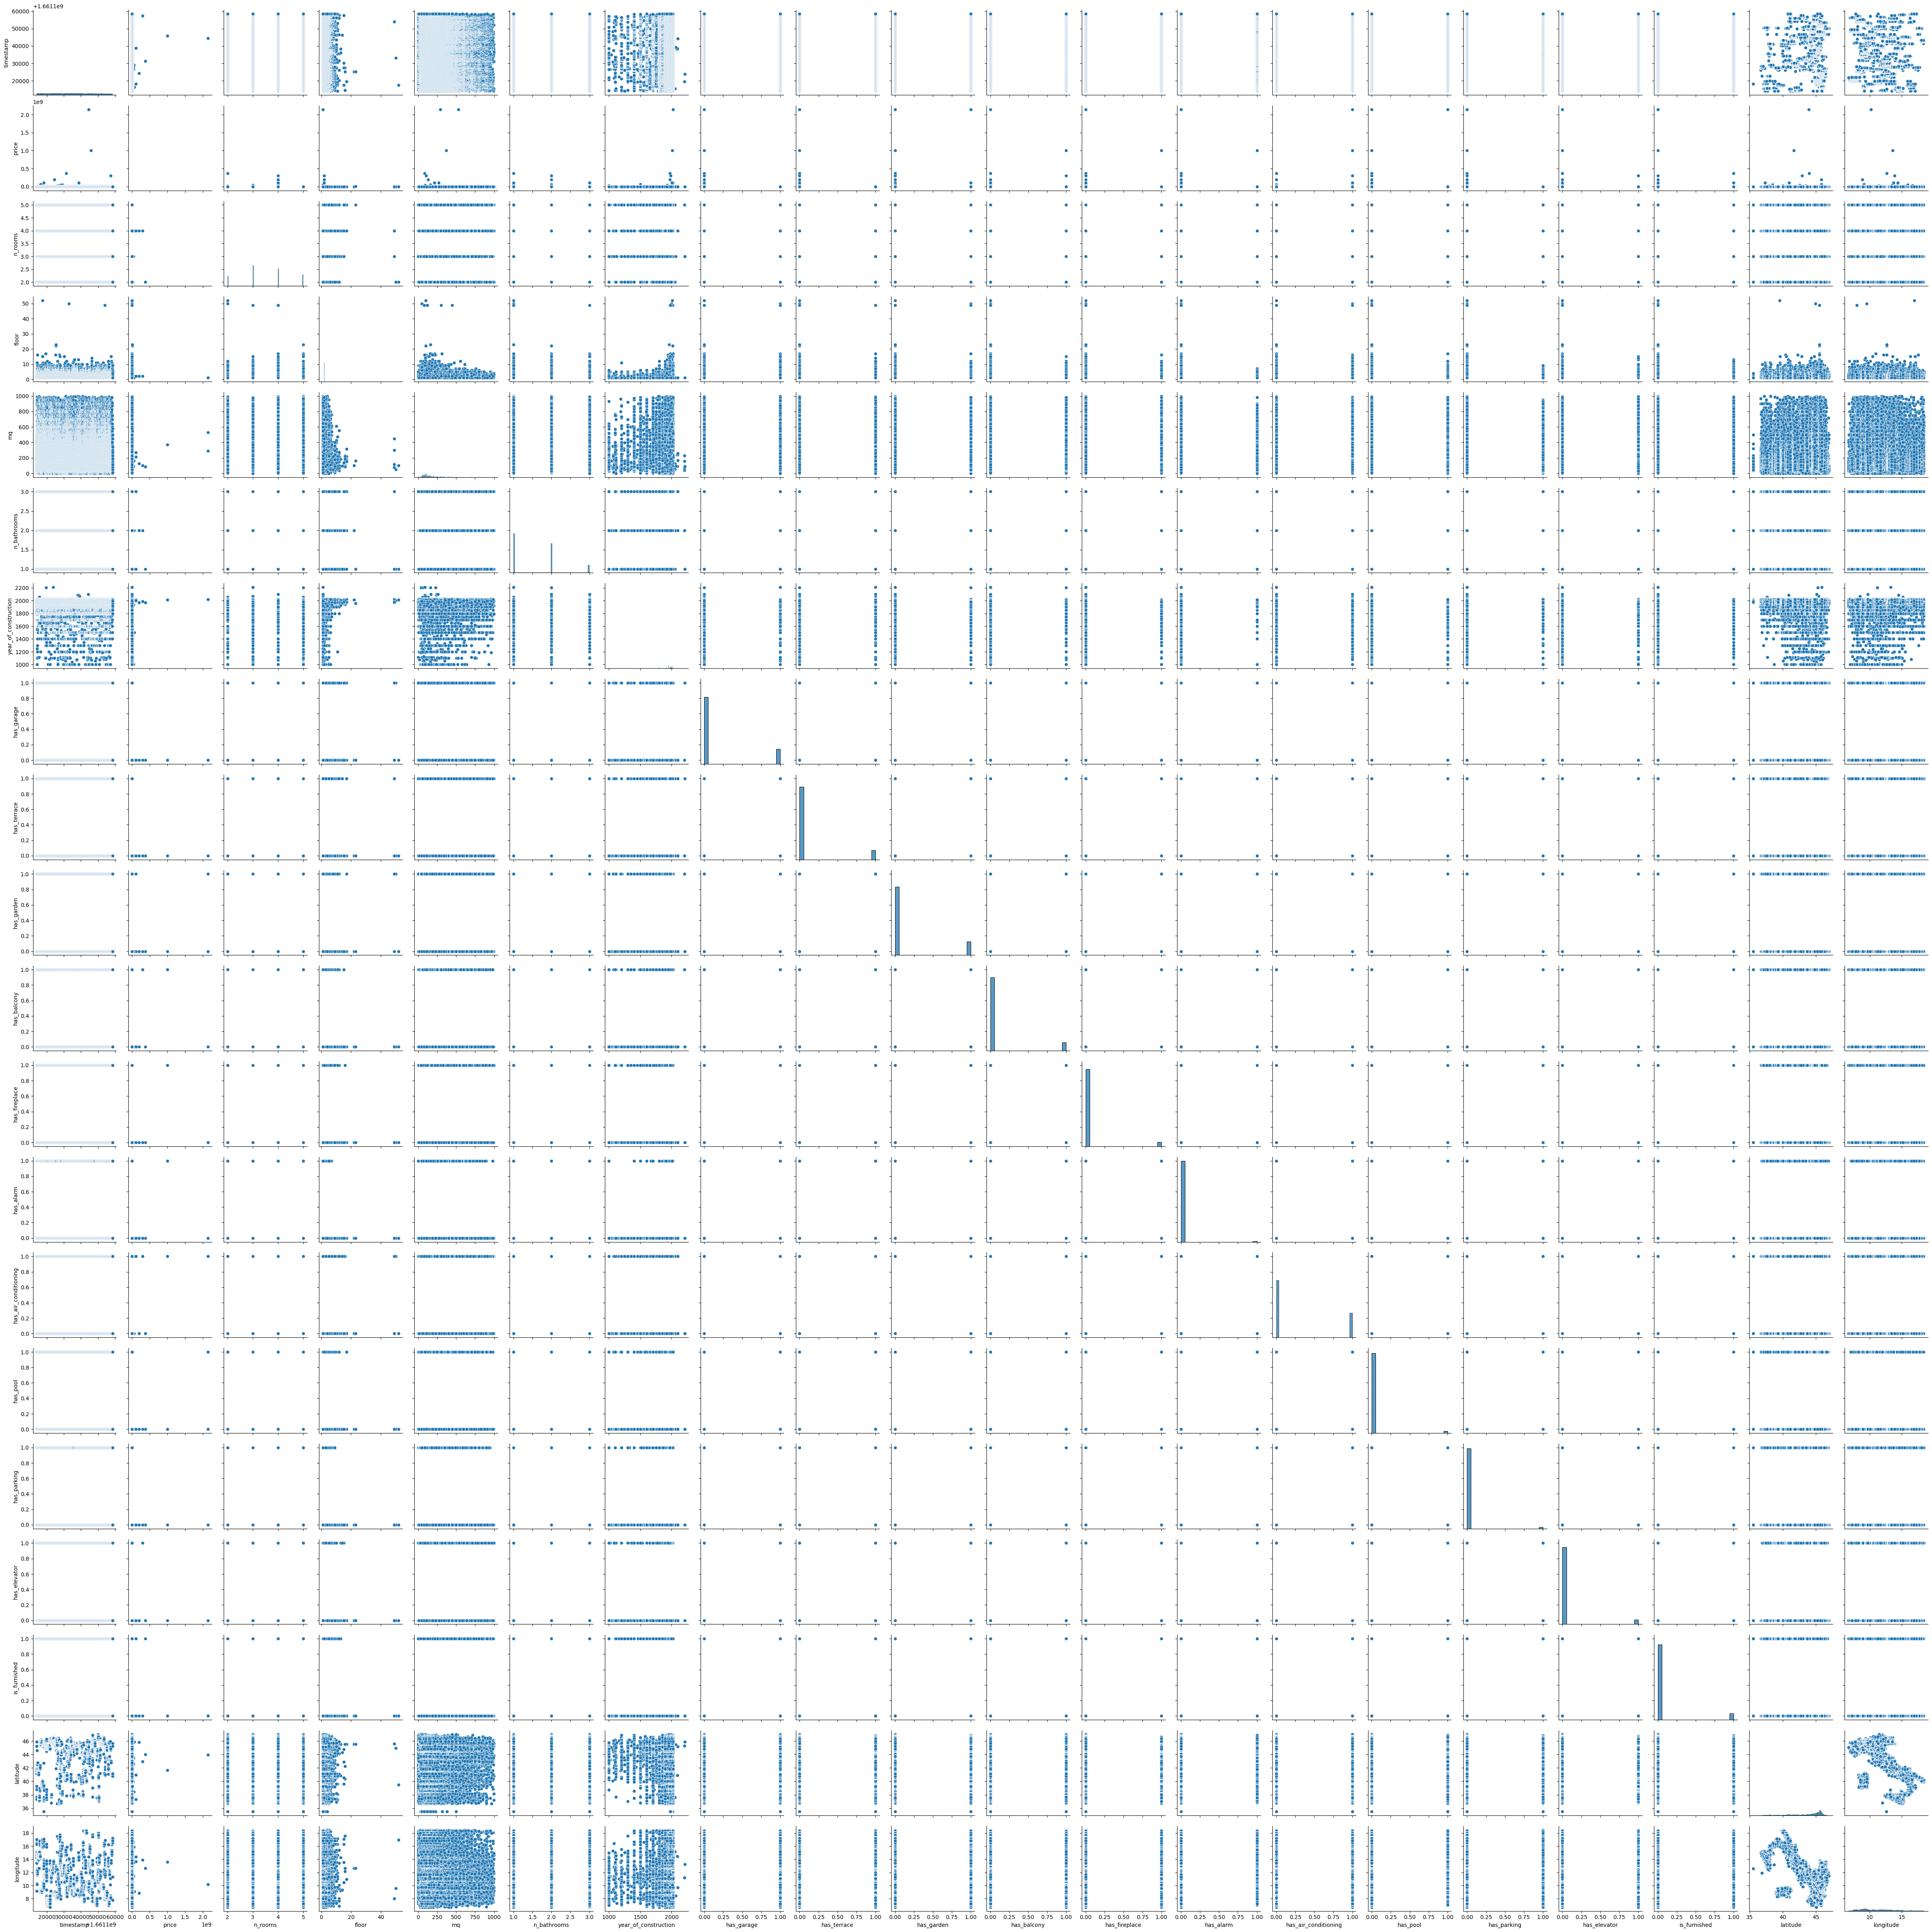

In [8]:
sns.pairplot (datos)

Los resultados de los gráficos no son claros en cuanto a las tendencias de estos, esto se puede deber a valores atípicos, para poder continuar con los procesamientos posteriores, se emplearán más técnicas de análisis exploratorio.  

Adicionalmente, se hará un mapa utilizando la librería de **Geopandas** para poder realizar una visualización general de los mapas y poder determinar en que región de Italia se pueden apreciar las tendencias determinadas mediante la regresión. Para esto se relizan los siguientes procedimientos:
Se crea una nueva columna de geometría con las coordenadas de puntos, se crea el geodataframe, se carga el mapa base, se crea el mapa y se imprime. 

In [21]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 3.4 MB/s eta 0:00:05
   -- ------------------------------------- 1.0/16.2 MB 2.6 MB/s eta 0:00:06
   --- ------------------------------------ 1.6/16.2 MB 2.7 MB/s eta 0:00:06
   ----- ---------------------------------- 2.4/16.2 MB 2.9 MB/s eta 0:00:05
   ------- -------------------------------- 2.9/16.2 MB 2.9 MB/s eta 0:00:05
   --------- ------------------------------ 3.7/16.2 MB 3.0 MB/s eta 0:00:05
   ---------- ----------------------------- 4.2/16.2 MB 3.0 MB/s eta 0:00:05
   ----------- ---------------------------- 4.7/16.2 MB 3.0 MB/s eta 0:00:04
   ------------ --------------------------- 5.2/16.2 MB 2.8 MB/s eta 0:00:04
   -------------- ------------------------- 5.8/16.2 MB 2.8 MB/s eta 0:00:04
   -------------- ------------------------- 6.0/16.2 MB 2.7 MB/s eta 0:00:04
   --------------- ------------------------ 6.3/16.2 MB 2.6 MB/s eta 0:00:04
   ---

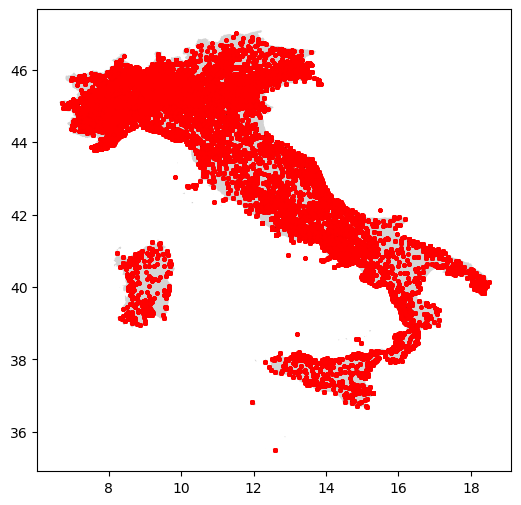

In [10]:
import geopandas as gpd
from shapely.geometry import Point

datos['geometry'] = datos.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)


gdf = gpd.GeoDataFrame(datos, geometry='geometry')
world = gpd.read_file('italy_Italy_Country_Boundary.shp')
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgray')

gdf.plot(ax=ax, color='red', markersize=5)
plt.show()

Como se puede apreciar en el mapa generado, los datos se encuentran distribuidos a lo largo del pais, lo cual asgura que los resultados obtenidos nos indicarán como es el comportamiento a nivel nacional.

Consecutivamente, se procede a realizar un conteo rápido de los datos para identificar carencias en las variables. 

In [12]:
total = len(datos)
conteos = datos.notna().sum()
ceros = (datos == 0).sum()
resultado = pd.DataFrame({
    'Total': total,
    'Con valor': conteos,
    'Valor 0': ceros
})
print(resultado)

                       Total  Con valor  Valor 0
timestamp             213409     213409        0
location              213409     213409        0
title                 213409     213409        0
price                 213409     175931        0
n_rooms               213409     155561        0
floor                 213409     144307        0
mq                    213409     209520        0
n_bathrooms           213409     199605        0
year_of_construction  213409     213399        0
availability          213409     213409        0
energy_class          213409     212761        0
status                213409     213409        0
heating               213409     213409        0
has_garage            213409     213409   174933
has_terrace           213409     213409   189548
has_garden            213409     213409   178222
has_balcony           213409     213409   191643
has_fireplace         213409     213409   201820
has_alarm             213409     213409   211459
has_air_conditioning

De los valores obtenidos, se pueden identificar 5 principales variables cuyos valores son casi en su totalidad 0, estos corresponden a:
* Tiene alarma
* Tiene estacionamiento
* Tiene alberca
* Tiene elevador
 
Consecutivamente, las variables cuyos valores también son en gran medida 0, correponden a:

* Esta amueblado
* Tiene balcón
* Tiene terraza
* Tiene jardín
* Tiene estacionamiento

Las variables identificadas mediante el análisis exploratorio son indicadores clave para determinar el precio de la vivienda y pueden tener peso en el desarrollo del modelo. Se procede a realizar un mapa de calor para poder medir la correlación que existe entre las variables de las que más se tienen valores. 

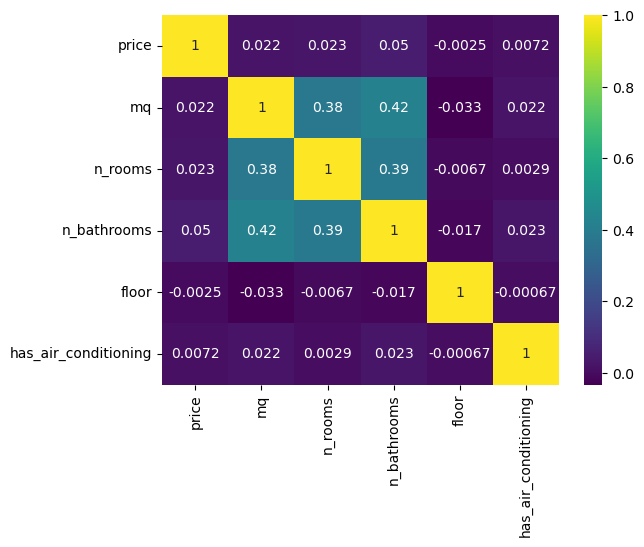

In [14]:
cor = datos[['price', 'mq', 'n_rooms', 'n_bathrooms', 'floor', 'has_air_conditioning']].corr()
sns.heatmap(cor, annot=True, cmap='viridis')
plt.show()

En el mapa de calor anterior, se puede observar que los valores de coorelación en la base de datos no son muy significativos para cualquier variable relacionada con el precio, se identifica una relación mayor entre los metros cuadrados y el numero de baños y habitaciones. Sin embargo, el precio no  indica corelaciones importantes con ninguna de las variables analizadas. 

Posteriormente, se determina donde se situan principalmente los datos de interés, para esto se contabilizan dentro de las variables de interés, donde se localizan los datos. 

In [16]:
conteos_piso = datos['floor'].value_counts()
conteos_bano = datos['n_rooms'].value_counts()
conteos_hab = datos['n_bathrooms'].value_counts()
conteos_metros = datos['mq'].value_counts()
print(conteos_piso)
print(conteos_hab)
print(conteos_bano)
print (conteos_metros)

floor
1.0     68991
2.0     49235
3.0     16788
4.0      5305
5.0      2252
6.0       933
7.0       411
8.0       169
9.0       118
10.0       38
11.0       23
12.0       15
16.0        6
15.0        6
49.0        5
17.0        4
13.0        3
52.0        1
22.0        1
23.0        1
50.0        1
14.0        1
Name: count, dtype: int64
n_bathrooms
1.0    102654
2.0     76584
3.0     20367
Name: count, dtype: int64
n_rooms
3.0    54243
4.0    45207
5.0    29740
2.0    26371
Name: count, dtype: int64
mq
100.0    7936
90.0     6564
80.0     6373
120.0    6094
70.0     5352
         ... 
948.0       1
979.0       1
764.0       1
919.0       1
922.0       1
Name: count, Length: 976, dtype: int64


Los datos en la columna de piso se localizan principalmente en el valor 1. Esta métrica puede servir para determinar el tipo de vivienda en cuestión, sin embargo, hay valores que superan el límite y se salen mucho del rango, indicando que estos valores pueden no ser representativos ya que pribablemente correponden a edificios, sesgando los datos. 

Para poder determinar si las variables mq, baños y habitaciones la cual tiene mayor relación con el precio se realiza un conteo de los datos limpios. 

In [61]:
conteos = datos[['floor', 'n_rooms', 'n_bathrooms', 'mq']].value_counts()
print(conteos)

floor  n_rooms  n_bathrooms  mq   
1.0    3.0      1.0          80.0     960
                             70.0     857
       2.0      1.0          50.0     841
       3.0      1.0          90.0     771
       2.0      1.0          60.0     722
                                     ... 
2.0    5.0      1.0          184.0      1
                             183.0      1
                             182.0      1
                             57.0       1
52.0   2.0      1.0          100.0      1
Name: count, Length: 10005, dtype: int64


Se procede a determinar si la variable de localizacion puede ser de utilidad realizando un conteo de las variables con valores similare, en caso de encontrar que los valores son muy singulares podría no ser una variable de interés. 

In [63]:
conteos = datos['location'].value_counts()
print(conteos)

location
bari                    186
reggio calabria         184
legnano                 182
pisa                    181
rapallo                 179
                       ... 
rocchetta palafea         1
acquaviva collecroce      1
lustra                    1
cornedo all'isarco        1
canistro                  1
Name: count, Length: 7023, dtype: int64


Consecutivamente, se realiza una exploración de los datos limpios en precio para poder determinar si hay un rango establecido o si existen sesgos.

In [57]:
print(datos_limpios['price'].describe())

count    1.759310e+05
mean     2.413253e+05
std      7.739356e+06
min      1.000000e+00
25%      7.700000e+04
50%      1.350000e+05
75%      2.350000e+05
max      2.147484e+09
Name: price, dtype: float64


Se identificaton valores de 0 y valores que superan significativamente a los demás. Para el siguiente tratamiento se tendrán en cuenta estas consideraciones en la toma de decisiones. 

In [66]:
Q1 = datos['price'].quantile(0.25)
Q3 = datos['price'].quantile(0.75)
IQR = Q3 - Q1

limiteI = Q1 - 1.5 * IQR
limiteS = Q3 + 1.5 * IQR

outliers = datos[(datos['price'] < limiteI) | (datos['price'] > limiteS)]

print(outliers) 

           timestamp     location  \
118     1.661114e+09    vitulazio   
250     1.661114e+09    siculiana   
261     1.661114e+09    vasanello   
319     1.661114e+09      viterbo   
350     1.661114e+09  vitorchiano   
...              ...          ...   
213329  1.661159e+09      adelfia   
213345  1.661159e+09      adelfia   
213382  1.661159e+09  alberobello   
213389  1.661159e+09  alberobello   
213391  1.661159e+09  alberobello   

                                                    title      price  n_rooms  \
118                         palazzo - edificio in vendita   920000.0      4.0   
250                         palazzo - edificio in vendita   800000.0      4.0   
261     terratetto unifamiliare via santa maria 113, v...   650000.0      NaN   
319          casale strada cassia nord, teverina, viterbo   540000.0      NaN   
350          casale strada sodarella, centro, vitorchiano  1200000.0      NaN   
...                                                   ...        ... 

Se cuenta con un total de 11 mil entradas como atípicas. Esto representa un 5 %, aunque no es un valor significativo hay que ser cautelosos en su tratamiento. Adicionalmente, se establecerá si los cuartiles al aumentar el coeficiente representan un valor menor o similar para determinar el tipo de tratamiento a que se deben someter los datos.

In [24]:
Q1 = datos['price'].quantile(0.25)
Q3 = datos['price'].quantile(0.75)
IQR = Q3 - Q1
coeficiente = 5

limiteI = Q1 - coeficiente * IQR
limiteS = Q3 + coeficiente * IQR

outliers = datos[(datos['price'] < limiteI) | (datos['price'] > limiteS)]

print(outliers) 

           timestamp           location  \
350     1.661114e+09        vitorchiano   
606     1.661114e+09            viterbo   
612     1.661114e+09            viterbo   
687     1.661114e+09  san lorenzo nuovo   
693     1.661114e+09           tuscania   
...              ...                ...   
211967  1.661158e+09           monopoli   
212421  1.661158e+09         conversano   
212533  1.661158e+09        locorotondo   
212535  1.661158e+09        locorotondo   
213234  1.661159e+09        alberobello   

                                                    title      price  n_rooms  \
350          casale strada sodarella, centro, vitorchiano  1200000.0      NaN   
606                         palazzo - edificio in vendita  2700000.0      5.0   
612                         palazzo - edificio in vendita  1150000.0      2.0   
687     villa unifamiliare, ottimo stato, 1355 m², san...  3200000.0      NaN   
693                         palazzo - edificio in vendita  1300000.0      3.0 

El principal objetivo de la presente práctica es predecir el costo de vivienda en intalia a partir de la base de datos proporcionada, en la cual se han identificado valores tanto de vivienda como de edificios y complejos habitacionales 

<div style="background-color: #dfe4ef; color: #616671; padding: 10px; border-radius: 15px; font-size: 12px; text-align:center">
  <h2>Conclusión del análisis exploratorio</h2>
<div style="background-color: #dfe4ef; color: #616671; padding: 10px; border-radius: 15px; font-size: 10px; text-align:center">
  <h2>Mediante el análisis exploratorio de la base de datos de vivienda en Italia se han identificado los principales componentes que integran la base, además de las principales carencias, con estas consideraciones de aplicarán cuidadosamente las técnicas de creación de características y limpieza de datos para poder geenrar los modelos de regresión. Se procurará eliminar la menor cantidad de variables que sea posible para evitar el sobreajuste</h2>
</div> 

<div style="background-color: #080930; color: #ffff; padding: 15px; border-radius: 15px; text-align:center">
  <h2>Procesamiento</h2>
</div>

# Creacion de caracteristicas 

La primer característica a crear consiste en la creación de 3 variables, las cuales se enlistan a continuación: 
* **fecha:** Para esto, se utilizará la variable contenida en la base de datos timestamp, la cual se encuentra en un formato númerico, a esta se le aplicará la conversión de tiempo Unix ya que se ha identificado que este es el formato con el que cuenta.
*  **Clase de energía numérica** Para esto se categorizó la eficiencia energética de las variables contenida como caracter a una categiría numérica representativa.
* **Localización numérica** Con la variable de location, se asignó un valor numérico a las variables de localización similar. 

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
datos['localizacion_numerica'] = le.fit_transform(datos['location'])
energy_class_mapping = {
    'a+': 100,
    'a': 90,
    'a1': 85,
    'a2': 80,
    'a3': 75,
    'a4': 70,
    'b': 60,
    'c': 50,
    'd': 40,
    'e': 30,
    'f': 20,
    'g': 10
}
datos['energy_class_numeric'] = datos['energy_class'].map(energy_class_mapping)
datos['fecha'] = pd.to_datetime(datos['timestamp'], unit='s')
datos.to_csv('DatosItalia.csv', index=False)
datos_limpios = pd.read_csv('DatosItalia.csv')
print(datos_limpios.head())

      timestamp      location  \
0  1.661114e+09     siculiana   
1  1.661114e+09     strongoli   
2  1.661114e+09        zelbio   
3  1.661114e+09    villamagna   
4  1.661114e+09  vallefiorita   

                                               title     price  n_rooms  \
0   villa unifamiliare via campo spoto 38, siculiana   46000.0      4.0   
1  quadrilocale contrada tronga 211, tronca, stro...  120000.0      4.0   
2          bilocale buono stato, piano terra, zelbio   55000.0      2.0   
3  casa colonica, da ristrutturare, 319 m², villa...  130000.0      4.0   
4            appartamento corso italia, vallefiorita   30000.0      NaN   

   floor     mq  n_bathrooms  year_of_construction      availability  ...  \
0    NaN   85.0          2.0                   NaN  not free / other  ...   
1    2.0  190.0          2.0                   NaN  not free / other  ...   
2    NaN   85.0          1.0                   NaN  not free / other  ...   
3    NaN  319.0          1.0              

In [33]:
conteo3 = datos_limpios.groupby(datos_limpios['fecha'].dt.year).size()
print (conteo3)

fecha
2022    213409
dtype: int64


Los datos se encuentran localizados temporalmente en su totalidad en el año 2022. Este nos permite concluir que esta columna no es de importancia para la generación de los modelos.  

Posteriormente, se grafica la distribución de las variables en la base de datos sometida al primer trataiento con el fin de poder identificar si exísten valores que puedan ser descartados, para posteriormente continuar identificando los valores atípicos. 

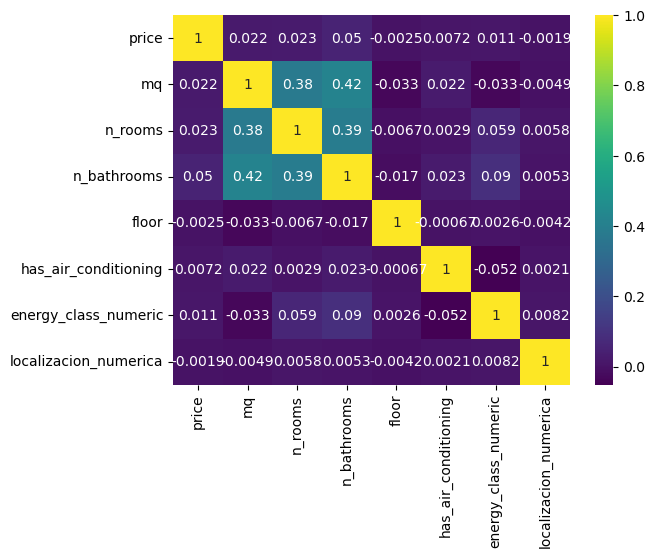

In [42]:
cor = datos_limpios[['price', 'mq', 'n_rooms', 'n_bathrooms', 'floor', 'has_air_conditioning', 'energy_class_numeric', 'localizacion_numerica']].corr()
sns.heatmap(cor, annot=True, cmap='viridis')
plt.show()

<Axes: >

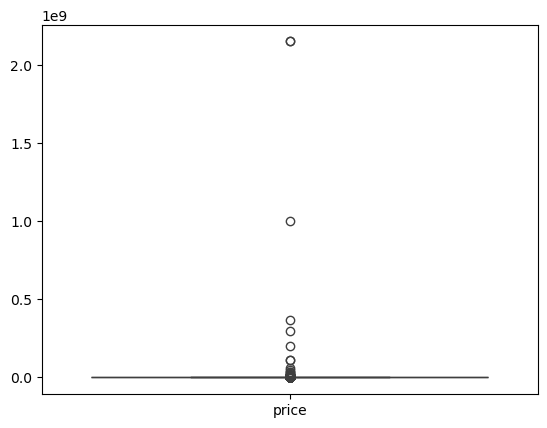

In [36]:
sns.boxplot(data=datos_limpios[['price']])

Se puede apreciar que dentro de la columna de precios existen valores atípicos que hacen que la visualización del gráfico no permita inferir comportamientos generales. 


# Limpieza de datos

Un métodos ampliamente conocido para manejar los valores atípicos implica determinar los límites superior e inferior por medio de la determinación del rango intercuartilico. Se procedió a eliminar estos valores para poder mejorar la distribución de los datos. Es importante destacar que este procedimiento se ha realizado teniendo en consideración que dentro del análisis exploratorio se identificaron valores muy elevados que correponden a edificios, villas o demás complejos habitacionales.

In [16]:
datos_limpios['price'] = pd.to_numeric(datos_limpios['price'], errors='coerce')
datos_limpios = datos_limpios.dropna(subset=['price'])
Q1 = datos_limpios['price'].quantile(0.25)
Q3 = datos_limpios['price'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
datos_sin_outliers = datos_limpios[(datos_limpios['price'] >= limite_inferior) & (datos_limpios['price'] <= limite_superior)]
print(datos_sin_outliers)

           timestamp      location  \
0       1.661114e+09     siculiana   
1       1.661114e+09     strongoli   
2       1.661114e+09        zelbio   
3       1.661114e+09    villamagna   
4       1.661114e+09  vallefiorita   
...              ...           ...   
213403  1.661159e+09          bari   
213404  1.661159e+09          bari   
213405  1.661159e+09          bari   
213406  1.661159e+09          bari   
213408  1.661159e+09          bari   

                                                    title     price  n_rooms  \
0        villa unifamiliare via campo spoto 38, siculiana   46000.0      4.0   
1       quadrilocale contrada tronga 211, tronca, stro...  120000.0      4.0   
2               bilocale buono stato, piano terra, zelbio   55000.0      2.0   
3       casa colonica, da ristrutturare, 319 m², villa...  130000.0      4.0   
4                 appartamento corso italia, vallefiorita   30000.0      NaN   
...                                                   ...      

Se procede a visualizar si los datos tienen una representación visual que permita establecer rangos confiables. 

<Axes: >

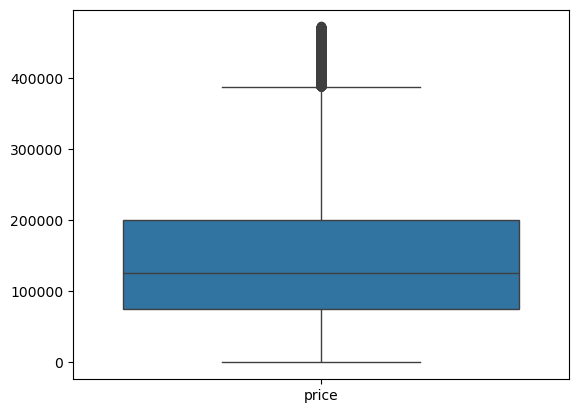

In [77]:
sns.boxplot(data=datos_sin_outliers[['price']])

Posteriormente, se eliminan los datos atípicos identificados en el gráfico anterior. 

In [80]:
datos_sin_outliers2 = datos_sin_outliers[datos_sin_outliers['price'] <= 300000]
print(datos_sin_outliers2)

           timestamp      location  \
0       1.661114e+09     siculiana   
1       1.661114e+09     strongoli   
2       1.661114e+09        zelbio   
3       1.661114e+09    villamagna   
4       1.661114e+09  vallefiorita   
...              ...           ...   
213403  1.661159e+09          bari   
213404  1.661159e+09          bari   
213405  1.661159e+09          bari   
213406  1.661159e+09          bari   
213408  1.661159e+09          bari   

                                                    title     price  n_rooms  \
0        villa unifamiliare via campo spoto 38, siculiana   46000.0      4.0   
1       quadrilocale contrada tronga 211, tronca, stro...  120000.0      4.0   
2               bilocale buono stato, piano terra, zelbio   55000.0      2.0   
3       casa colonica, da ristrutturare, 319 m², villa...  130000.0      4.0   
4                 appartamento corso italia, vallefiorita   30000.0      NaN   
...                                                   ...      

<Axes: >

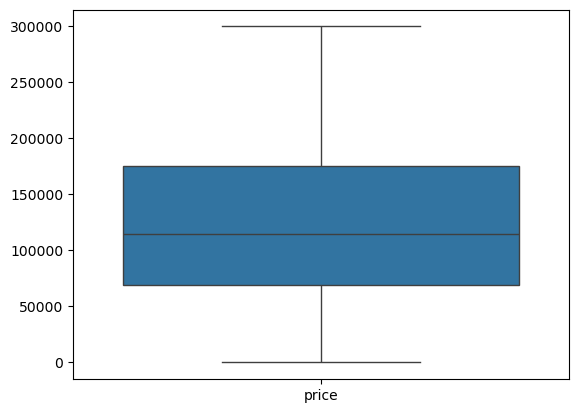

In [115]:
sns.boxplot(data=datos_sin_outliers2[['price']])

<Axes: >

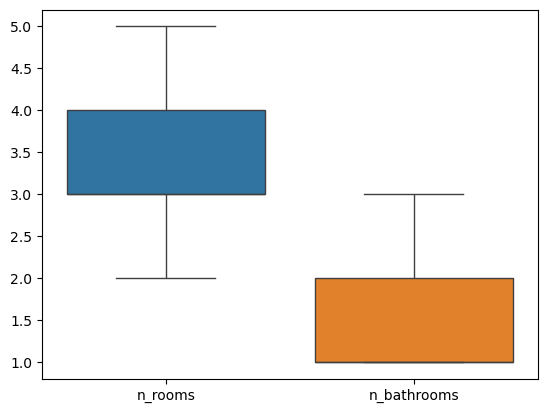

In [97]:
sns.boxplot(data=datos_sin_outliers2[['n_rooms', 'n_bathrooms']])

Los graficos nos muestran mejor resolución en los datos que se tienen. Indicando que se pueden reducir los errores en los modelos predictivos que se generen. 

In [94]:
columnas_interes = ['mq', 'n_bathrooms', 'n_rooms', 'floor']
media = datos_limpios[columnas_interes].mean()
desviacion_estandar = datos_sin_outliers2[columnas_interes].std()
coeficiente_variacion = (desviacion_estandar / media) * 100
print("Coeficiente de Variación (CV) por columna:")
print(coeficiente_variacion)

Coeficiente de Variación (CV) por columna:
mq             63.319426
n_bathrooms    39.082732
n_rooms        27.973660
floor          62.698178
dtype: float64


El análisis estadístico nos indica que la variable de habitaciones es la que más tiene los datos agrupados cerca de la mediana. 

# Reducción de dimensionalidad

In [117]:
datos_temp = datos_sin_outliers2.drop(columns=['year_of_construction', 'availability', 'status'])
datos_temp.to_csv('DatosItaliaFinal_Limpio.csv', index=False)

In [119]:
datosfinales = pd.read_csv ('DatosItaliaFinal_Limpio.csv')
print (datosfinales)

           timestamp      location  \
0       1.661114e+09     siculiana   
1       1.661114e+09     strongoli   
2       1.661114e+09        zelbio   
3       1.661114e+09    villamagna   
4       1.661114e+09  vallefiorita   
...              ...           ...   
148663  1.661159e+09          bari   
148664  1.661159e+09          bari   
148665  1.661159e+09          bari   
148666  1.661159e+09          bari   
148667  1.661159e+09          bari   

                                                    title     price  n_rooms  \
0        villa unifamiliare via campo spoto 38, siculiana   46000.0      4.0   
1       quadrilocale contrada tronga 211, tronca, stro...  120000.0      4.0   
2               bilocale buono stato, piano terra, zelbio   55000.0      2.0   
3       casa colonica, da ristrutturare, 319 m², villa...  130000.0      4.0   
4                 appartamento corso italia, vallefiorita   30000.0      NaN   
...                                                   ...      

Acto seguido a la reducción de la dimensionalidad, se asignan valores a las celdas nulas en baños, habitaciones y piso con el argumento siguiente: 
* Habitaciones: Ya que las habitaciones se observaron con mayor cercanía a la media con el coeficiente de variación
* Piso: Se asigna la moda por ser significativamente mayor a los demás, adicionalmente se eliminan los valore superiores a 2 que pueden indicar edificaciones grande
* baños: Se utilizó la mediana ya que se observó un mayor sesgo en los datos. 

In [144]:
media_n_rooms = datosfinales['n_rooms'].mean()
moda_n_floor = datosfinales['floor'].mode()[0]
mediana_n_bano = datosfinales['n_bathrooms'].median()

datosfinales['n_rooms'] = datosfinales['n_rooms'].fillna(media_n_rooms)
datosfinales['floor'] = datosfinales['floor'].fillna(moda_n_floor)
datosfinales['n_bathrooms'] = datosfinales['n_bathrooms'].fillna(mediana_n_bano)

datosfinales = datosfinales.dropna(subset=['n_bathrooms'])
datosfinales = datosfinales.dropna(subset=['energy_class_numeric'])

datosfinales = datosfinales[datosfinales['mq'] >= 40]
datosfinales = datosfinales[datosfinales['floor'] <= 2]

datosfinales.to_csv('DatosItaliaFinal_Limpio.csv', index=False)

print(datosfinales)

           timestamp      location  \
1       1.661114e+09     strongoli   
2       1.661114e+09        zelbio   
3       1.661114e+09    villamagna   
4       1.661114e+09  vallefiorita   
5       1.661114e+09     siculiana   
...              ...           ...   
148662  1.661159e+09          bari   
148663  1.661159e+09          bari   
148664  1.661159e+09          bari   
148665  1.661159e+09          bari   
148666  1.661159e+09          bari   

                                                    title     price   n_rooms  \
1       quadrilocale contrada tronga 211, tronca, stro...  120000.0  4.000000   
2               bilocale buono stato, piano terra, zelbio   55000.0  2.000000   
3       casa colonica, da ristrutturare, 319 m², villa...  130000.0  4.000000   
4                 appartamento corso italia, vallefiorita   30000.0  3.415418   
5                  appartamento via castellana, siculiana   59000.0  3.415418   
...                                                   ...

Una vez creada la base de datos en la que se eliminaron las columnas que no son de utilidad para la regresión y se eliminaron los datos atípicos, se procede a hacer un análisis de componentes principales y análisis de discriminación lineal para identificar si se pueden eliminar más variables. 

In [148]:
total = len(datosfinales)
conteos = datosfinales.notna().sum()
ceros = (datosfinales == 0).sum()
resultado = pd.DataFrame({
    'Total': total,
    'Con valor': conteos,
    'Valor 0': ceros
})
print(resultado)

                        Total  Con valor  Valor 0
timestamp              126757     126757        0
location               126757     126757        0
title                  126757     126757        0
price                  126757     126757        0
n_rooms                126757     126757        0
floor                  126757     126757        0
mq                     126757     126757        0
n_bathrooms            126757     126757        0
energy_class           126757     126757        0
heating                126757     126757        0
has_garage             126757     126757   101245
has_terrace            126757     126757   111674
has_garden             126757     126757   104406
has_balcony            126757     126757   112176
has_fireplace          126757     126757   118919
has_alarm              126757     126757   125575
has_air_conditioning   126757     126757    87441
has_pool               126757     126757   125285
has_parking            126757     126757   124605


# Selección de características

Para poder determinar si la limpieza que se ha realizado hasta este punto es correcta, se procedió a verificar mediante un Análisis de Componentes Principales y un Análisis Discriminante Lineal para identificar como se distribuyen los datos y continuar con la regresión o bien aplicar algún tratamiento adicional. 

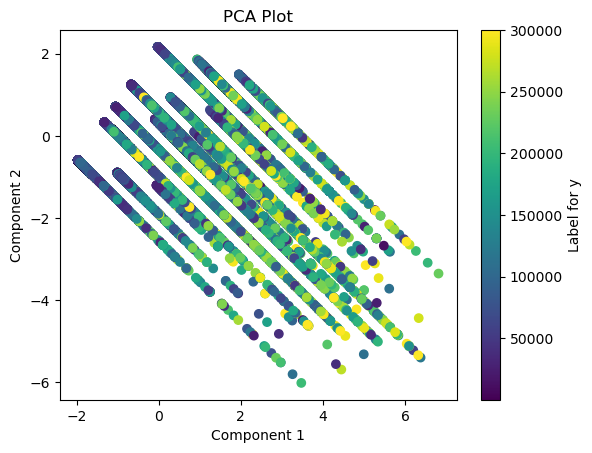

In [152]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

datos = pd.read_csv('DatosItaliaFinal_Limpio.csv')

datos = datos.dropna()

X = datos[['n_rooms', 'mq', 'n_bathrooms']]
y = datos['price']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X_scaled)

assert X_PCA.shape[0] == y.shape[0], "Las dimensiones de X_PCA y y no coinciden"

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y)  
plt.title('PCA Plot')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Label for y') 
plt.show()


C:\Users\ingeo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


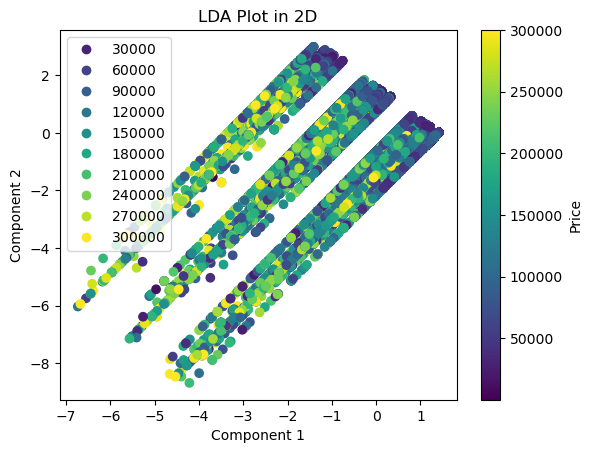

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

datos = pd.read_csv('DatosItaliaFinal_Limpio.csv')

datos = datos.dropna()

X = datos[['n_rooms', 'mq', 'n_bathrooms']]
y = datos['price']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=2)
X_LDA = lda.fit_transform(X_scaled, y) 

scatter = plt.scatter(X_LDA[:, 0], X_LDA[:, 1], c=y)
plt.title('LDA Plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Price') 
plt.legend(*scatter.legend_elements())
plt.show()


El análisis indica que los datos se encuentran en proximidad entre las variables, para poder continuar con la regresión se aplicó un tratamiento final en el que se eliminaron las variables que habían sido previamente transformadas y aquellas que no tienen significancia.

In [20]:
datos_reducidos = datos_sin_outliers.drop(columns=['timestamp', 'year_of_construction', 'availability', 'status', 'location', 'title', 'floor', 'energy_class', 'heating', 'latitude', 'longitude', 'fecha'])
datos_reducidos = datos_reducidos.dropna()
datos_reducidos.to_csv('datos_reducidos.csv', index=False)
print(datos_sin_outliers)
print(datos_reducidos)

           timestamp      location  \
0       1.661114e+09     siculiana   
1       1.661114e+09     strongoli   
2       1.661114e+09        zelbio   
3       1.661114e+09    villamagna   
4       1.661114e+09  vallefiorita   
...              ...           ...   
213403  1.661159e+09          bari   
213404  1.661159e+09          bari   
213405  1.661159e+09          bari   
213406  1.661159e+09          bari   
213408  1.661159e+09          bari   

                                                    title     price  n_rooms  \
0        villa unifamiliare via campo spoto 38, siculiana   46000.0      4.0   
1       quadrilocale contrada tronga 211, tronca, stro...  120000.0      4.0   
2               bilocale buono stato, piano terra, zelbio   55000.0      2.0   
3       casa colonica, da ristrutturare, 319 m², villa...  130000.0      4.0   
4                 appartamento corso italia, vallefiorita   30000.0      NaN   
...                                                   ...      

Finalmente se realiza un análisis de correlación en un mapa de calor para poder determinar cual es la corelación que existe entre estas y determinar si se ha mejorado en cuanto a su relación entre ellas

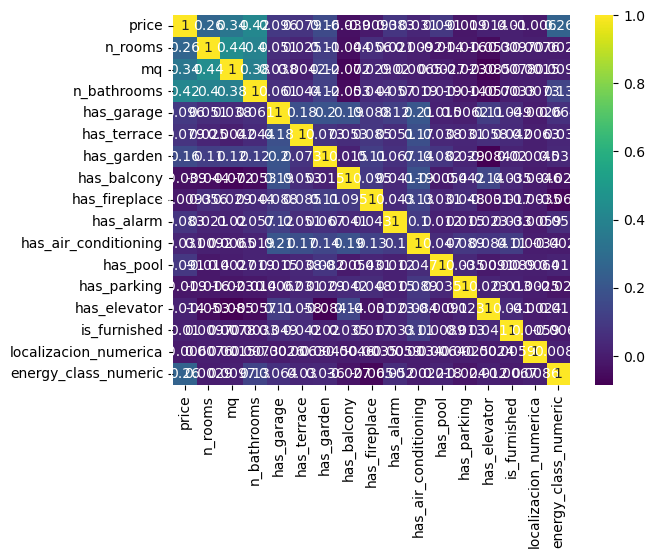

In [228]:
cor = prueba.corr()
sns.heatmap(cor, annot=True, cmap='viridis')
plt.show()

<div style="background-color: #dfe4ef; color: #616671; padding: 10px; border-radius: 15px; font-size: 12px; text-align:center">
  <h2>Conclusión del procesamiento</h2>
<div style="background-color: #dfe4ef; color: #616671; padding: 10px; border-radius: 15px; font-size: 10px; text-align:center">
  <h2>El procesamiento de los datos implicó la eliminación de multiples columnas que no tenian importancia para el análisis por medio de regresión de acuerdo con lo observado en los PCA, LDA y los mapas de calor además de los valores estadísticos calculados. Adicionalmente se han convertido las variables que pueden tener impacto en la regresión y mejorar la precisión de la misma. Asimismo, se han eliminado las entradas que generan ruido y pueden sesgar el modelo.</h2>

<div style="background-color: #080930; color: #ffff; padding: 15px; border-radius: 15px; text-align:center">
  <h2>Regresión lineal</h2>
</div>

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

datosfinal = pd.read_csv('datos_reducidos.csv')

X1 = datosfinal[['n_rooms', 
                'energy_class_numeric', 
                'localizacion_numerica',
                'is_furnished', 
                'has_elevator',
                'has_parking', 
                'has_pool', 
                'mq', 
                'n_bathrooms', 
                'has_balcony', 
                'has_alarm', 
                'has_air_conditioning', 
                'has_garage', 
                'has_fireplace', 
                'has_terrace', 
                'has_garden']]
y1 = datosfinal['price']
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y, test_size=0.2, random_state=42)
modelo_lineal = LinearRegression()

modelo_lineal.fit(X1_train, y1_train)
y1_pred = modelo_lineal.predict(X1_test)

r2 = r2_score(y1_test, y1_pred)
print(f'R²: {r2}')


R²: 0.2855908952741385


<div style="background-color: #080930; color: #ffff; padding: 15px; border-radius: 15px; text-align:center">
  <h2>Regresión Lasso</h2>
</div>

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

datos = pd.read_csv('datos_reducidos.csv')

X2 = datosfinal[['n_rooms', 
                'energy_class_numeric', 
                'localizacion_numerica',
                'is_furnished', 
                'has_elevator',
                'has_parking', 
                'has_pool', 
                'mq', 
                'n_bathrooms', 
                'has_balcony', 
                'has_alarm', 
                'has_air_conditioning', 
                'has_garage', 
                'has_fireplace', 
                'has_terrace',
                'has_garden']]

y2 = datosfinal['price']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

lasso = Lasso(alpha=1.0)  
lasso.fit(X2_train_scaled, y2_train)

y2_pred = lasso.predict(X2_test_scaled)
r2 = r2_score(y2_test, y2_pred)

print(f"R² del modelo Lasso: {r2}")

R² del modelo Lasso: 0.2855912337130224


<div style="background-color: #080930; color: #ffff; padding: 15px; border-radius: 15px; text-align:center">
  <h2>Regresión Polinomial</h2>
</div>

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

datosfinal = pd.read_csv('datos_reducidos.csv')

X3 = datosfinal[['n_rooms', 
                'energy_class_numeric', 
                'localizacion_numerica',
                'is_furnished', 
                'has_elevator',
                'has_parking', 
                'has_pool', 
                'mq', 
                'n_bathrooms', 
                'has_balcony', 
                'has_alarm', 
                'has_air_conditioning', 
                'has_garage', 
                'has_fireplace', 
                'has_terrace',
                'has_garden']]

y3 = datosfinal['price']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)  
X3_train_poly = poly.fit_transform(X3_train)
X3_test_poly = poly.transform(X3_test)

modelo_poly = LinearRegression()
modelo_poly.fit(X3_train_poly, y3_train)

y3_pred_pol = modelo_poly.predict(X3_test_poly)

r2 = r2_score(y3_test, y3_pred_pol)
print(f'R²: {r2}')

R²: 0.3131207387718207


In [67]:
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

datosfinal = pd.read_csv('datos_reducidos.csv')

X4 = datosfinal[['n_rooms', 
                'energy_class_numeric', 
                'localizacion_numerica',
                'is_furnished', 
                'has_elevator',
                'has_parking', 
                'has_pool', 
                'mq', 
                'n_bathrooms', 
                'has_balcony', 
                'has_alarm', 
                'has_air_conditioning', 
                'has_garage', 
                'has_fireplace', 
                'has_terrace', 
                'has_garden']]
y4 = datosfinal['price']

scaler = StandardScaler()
X4_scaled = scaler.fit_transform(X4)

modelo_elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)  

modelo_elastic.fit(X4_scaled, y4)

y4_pred = modelo_elastic.predict(X4_scaled)

r2 = r2_score(y4, y4_pred)

print(f'R²: {r2}')

R²: 0.2659970745860525


<div style="background-color: #080930; color: #ffff; padding: 15px; border-radius: 15px; text-align:center">
  <h2>PRUEBA</h2>
</div>


Incialmente y para evitar interferencias, se aplicarán los mismos tratamientos a los datos de prueba que se aplicaron a los datos de entrenamiento, estos son la creación y extracción de características y la limpieza de datos.

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

datos_prueba = pd.read_csv('test_housing_data_italy.csv')

le = LabelEncoder()
datos_prueba['localizacion_numerica'] = le.fit_transform(datos_prueba['location'])

energy_class_mapping = {
    'a+': 100,
    'a': 90,
    'a1': 85,
    'a2': 80,
    'a3': 75,
    'a4': 70,
    'b': 60,
    'c': 50,
    'd': 40,
    'e': 30,
    'f': 20,
    'g': 10
}
datos_prueba['energy_class_numeric'] = datos_prueba['energy_class'].map(energy_class_mapping)

datos_prueba = datos_prueba.dropna()

print(datos_prueba.head())

       timestamp     location  \
0   1.661122e+09     caravino   
1   1.661116e+09     valbrona   
5   1.661123e+09   sedegliano   
6   1.661121e+09      mappano   
10  1.661145e+09  esanatoglia   

                                                title     price  n_rooms  \
0       appartamento via perosio 26, centro, caravino   95000.0      5.0   
1                      trilocale via milano, valbrona   99000.0      3.0   
5         villa unifamiliare via aquileia, sedegliano   95000.0      5.0   
6     appartamento via generale dalla chiesa, mappano  149000.0      5.0   
10  terratetto unifamiliare via roma 84, centro, e...  100000.0      4.0   

    floor     mq  n_bathrooms  year_of_construction      availability  ...  \
0     3.0  190.0          2.0                1967.0  not free / other  ...   
1     1.0   80.0          1.0                1970.0  not free / other  ...   
5     3.0  128.0          2.0                1930.0  not free / other  ...   
6     2.0  105.0          2.0   

Se procede a aplicar los modelos...

In [75]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

X_prueba = datos_prueba[['n_rooms', 
                          'energy_class_numeric', 
                          'localizacion_numerica',
                          'is_furnished', 
                          'has_elevator',
                          'has_parking', 
                          'has_pool', 
                          'mq', 
                          'n_bathrooms', 
                          'has_balcony', 
                          'has_alarm', 
                          'has_air_conditioning', 
                          'has_garage', 
                          'has_fireplace', 
                          'has_terrace', 
                          'has_garden']]
y_prueba = datos_prueba['price']

scaler = StandardScaler()
X_prueba_scaled = scaler.fit_transform(X_prueba)

modelo_lineal = LinearRegression()
modelo_lineal.fit(X_prueba_scaled, y_prueba)
y_pred_lineal = modelo_lineal.predict(X_prueba_scaled)
print('Lineal R²:', r2_score(y_prueba, y_pred_lineal))

modelo_lasso = Lasso(alpha=1.0)  
modelo_lasso.fit(X_prueba_scaled, y_prueba)
y_pred_lasso = modelo_lasso.predict(X_prueba_scaled)
print('Lasso R²:', r2_score(y_prueba, y_pred_lasso))

poly = PolynomialFeatures(degree=2)  
X_poly = poly.fit_transform(X_prueba_scaled)
modelo_pol = LinearRegression()
modelo_pol.fit(X_poly, y_prueba)
y_pred_pol = modelo_pol.predict(X_poly)
print('Polinómico R²:', r2_score(y_prueba, y_pred_pol))

modelo_en = ElasticNet(alpha=1.0, l1_ratio=0.5)  
modelo_en.fit(X_prueba_scaled, y_prueba)
y_pred_en = modelo_en.predict(X_prueba_scaled)
print('ElasticNet R²:', r2_score(y_prueba, y_pred_en))

Lineal R²: 0.2625048505179286
Lasso R²: 0.2625048497024751
Polinómico R²: 0.32675651053906996
ElasticNet R²: 0.24607638784590924


<div style="background-color: #080930; color: #ffff; padding: 15px; border-radius: 15px; text-align:center">
  <h2>CONCLUSIÓN Y DISCUSIÓN</h2>
</div>


<div style="background-color: #dfe4ef; color: #616671; padding: 10px; border-radius: 15px; font-size: 12px; text-align:center">
  <h2>Discusión</h2>
    
El manejo del dataset de viviendas en Italia ha implicado un considerable esfuerzo de análisis y procesamiento. El dataset original contiene numerosas variables que pueden complicar la generación de modelos de Machine Learning. Es crucial prestar atención a los detalles y considerar el impacto que las decisiones tomadas durante el procesamiento de la información pueden tener en la efectividad de los modelos. Este proceso no solo ha requerido la limpieza de datos, sino también la extracción de características a partir de la información disponible, con el fin de obtener un panorama más amplio y mejorar la precisión del modelo. Aunque los valores de R^2 obtenidos no son ideales para considerar estos modelos como completamente certeros, el desarrollo de esta práctica ha permitido identificar las dificultades que enfrenta la ciencia de datos al procesar información y la importancia de la calidad de los datos para el modelado predictivo.

<div style="background-color: #dfe4ef; color: #616671; padding: 10px; border-radius: 15px; font-size: 12px; text-align:center">
  <h2>Conclusión</h2>
    
Los coeficientes de correlación (𝑅^2) son una métrica estadística que permite evaluar la precisión de la predicción de una variable en relación con otras. En el caso del dataset de viviendas en Italia, estos valores no son suficientemente robustos para clasificar los modelos como exactos. En futuros análisis de datos, es importante considerar evaluaciones más precisas que permitan identificar relaciones más específicas. Por ejemplo, calcular la relación individual entre variables mediante regresiones lineales particulares puede facilitar la predicción de valores faltantes, en lugar de descartarlos. Se identificó que la regresión polinómica es la que proporciona la mayor precisión al analizar los datos de entrada, posiblemente debido a su capacidad para captar relaciones no lineales en los datos, lo que le permite modelar de manera más efectiva la complejidad de las interacciones entre las variables.

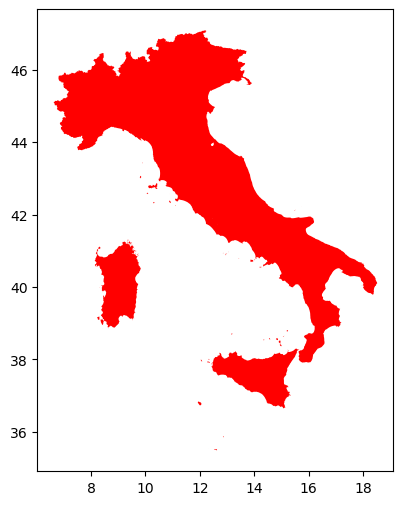

Questo è il mio rapporto


In [90]:
import geopandas as gpd
import matplotlib.pyplot as plt
world = gpd.read_file('italy_Italy_Country_Boundary.shp')
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='red')
plt.show()
print('Questo è il mio rapporto') 